In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\asaha\\Downloads\\german_credit_data.csv")

In [4]:
# # Exploratory Data Analysis (EDA)
# Print the first few rows of the dataset
print(data.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [5]:
# Summary statistics
print(data.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


In [6]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


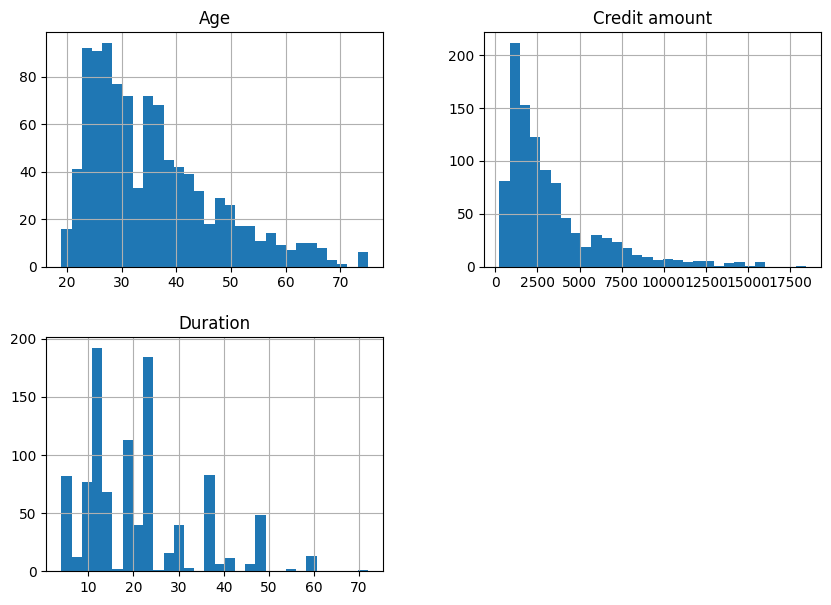

In [7]:
# Visualize distributions of numerical attributes
numerical_cols = ['Age', 'Credit amount', 'Duration']
data[numerical_cols].hist(bins=30, figsize=(10, 7))
plt.show()

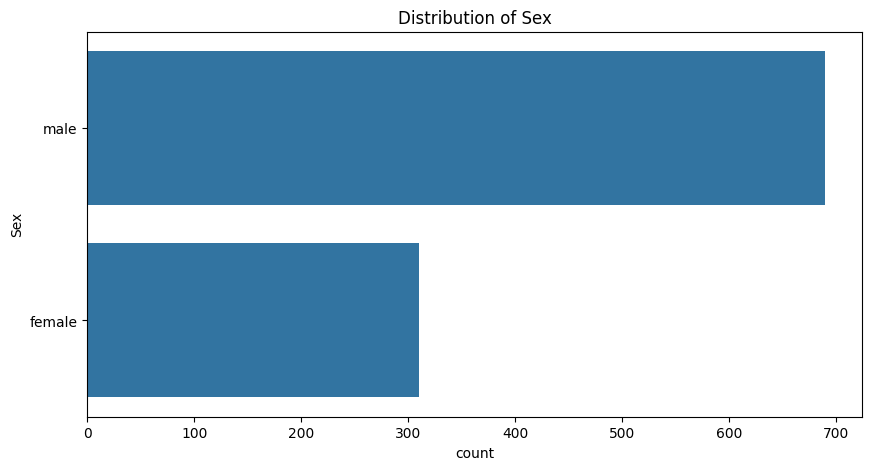

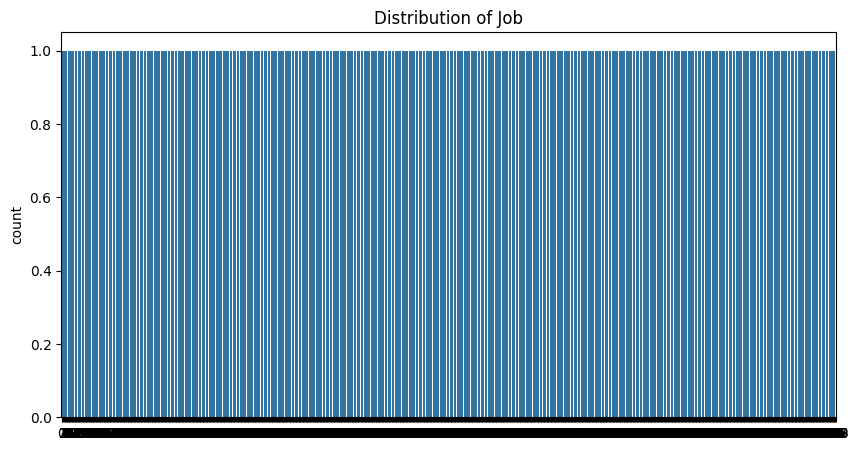

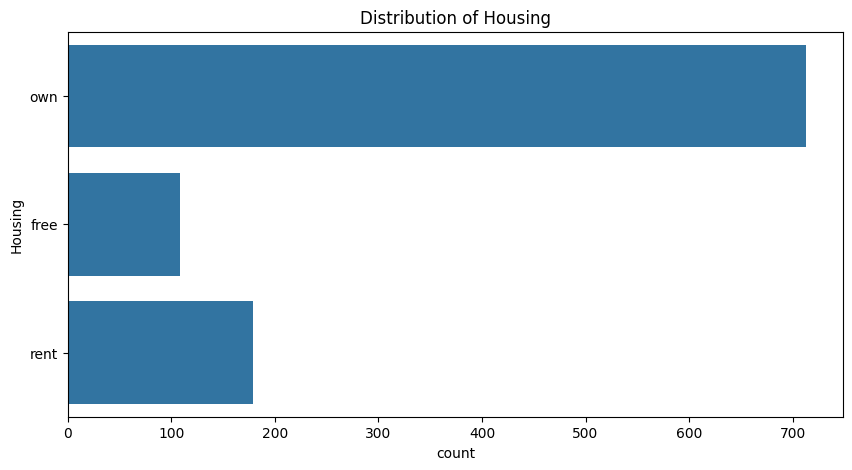

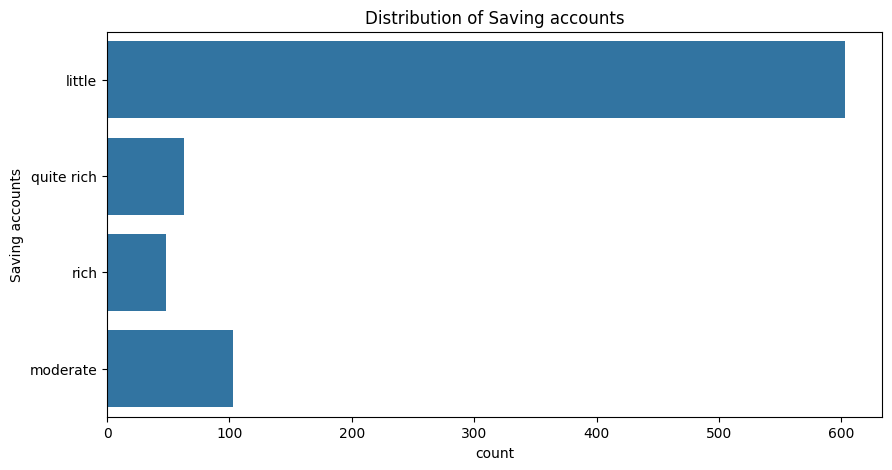

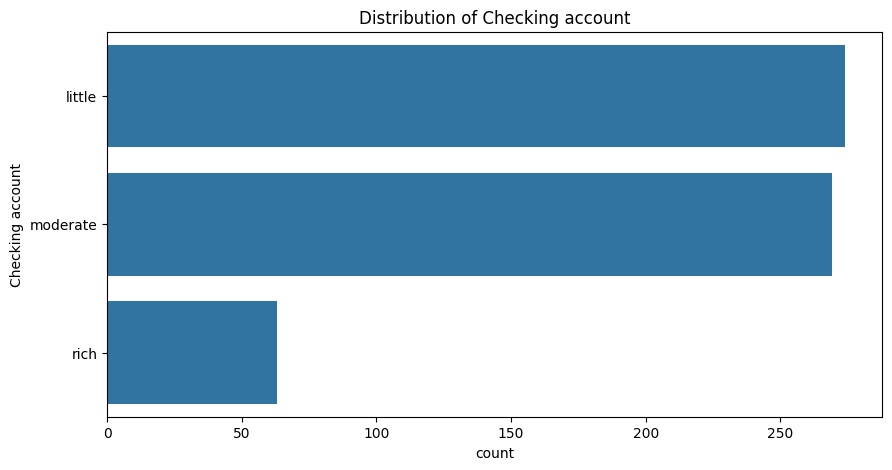

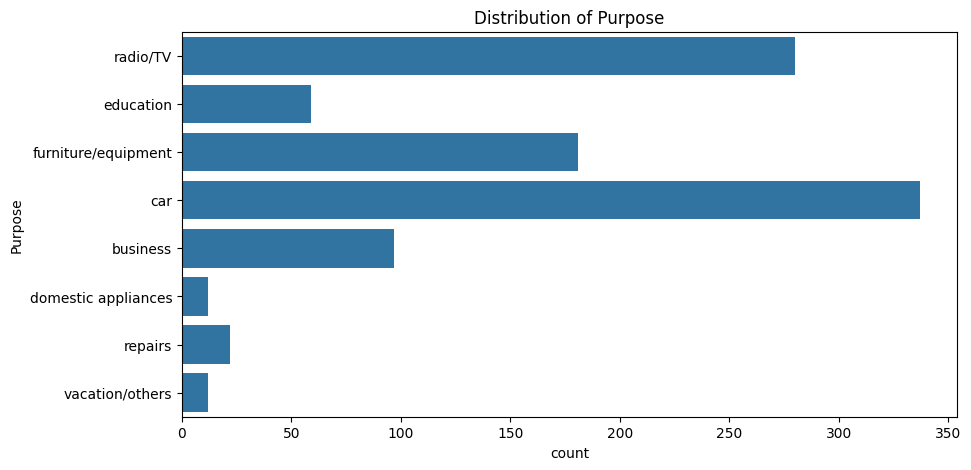

In [8]:
# Visualize categorical attributes
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

## DATA CLEANING

In [11]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

In [12]:
# Handle incorrect data entries, e.g., negative values in 'Age'
data = data[data['Age'] > 0]

## DATA IMPUTATION

In [13]:
# Impute missing values for categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [14]:
# Impute missing values for numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

In [15]:
# Verify that there are no missing values
print(data.isnull().sum())

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


## DATA ENCODING

In [16]:
# Encode categorical variables using OneHotEncoder
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

## DATA NORMALIZATION AND SCALING

In [17]:
# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## DATA REDUCTION

In [18]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data)

## DATA SAMPLING 

In [19]:
# Split the data into training and testing sets
X = data.drop('Credit amount', axis=1)  # Assuming 'Credit amount' is the target variable
y = data['Credit amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Print shapes of the datasets
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (800, 21)
Testing data shape: (200, 21)


## DATA INTEGRATION

In [21]:
# Integrate the PCA components back to the dataset if needed
data_pca_df = pd.DataFrame(data_pca, columns=[f'PCA_{i}' for i in range(1, 6)])
final_data = pd.concat([data.reset_index(drop=True), data_pca_df], axis=1)

In [22]:
print(final_data.head())

   Unnamed: 0       Age  Credit amount  Duration  Sex_male  Job_1  Job_2  \
0           0  0.857143       0.050567  0.029412      True  False   True   
1           1  0.053571       0.313690  0.647059     False  False   True   
2           2  0.535714       0.101574  0.117647      True   True  False   
3           3  0.464286       0.419941  0.558824      True  False   True   
4           4  0.607143       0.254209  0.294118      True  False   True   

   Job_3  Housing_own  Housing_rent  ...  Purpose_education  \
0  False         True         False  ...              False   
1  False         True         False  ...              False   
2  False         True         False  ...               True   
3  False        False         False  ...              False   
4  False        False         False  ...              False   

   Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                        False              True            False   
1                        F